Department of Physics, University of Pisa (AA 20202-2023)

### Multimessenger Physics Laboratory



## Data Analysis experience - Gravitational Waves 
#### (M. Razzano, Apr 26,2023)

This notebook serves as outline for the data analysis experience of gravitational wave events from coalescing systems. You can see more details on the various commands in the tutorial stored in the tutorials directory.

**Do not forget** to add the extra files that you might use for the analysis, e.g. the data files to this Github repository in the data directory

More details are contained in the PDF file containing the description of this experience, that is available on Moodle (e-learning)

### Basic Setup
First of all, we import the required modules and we download the data file.

In [26]:
import os   #These two are useful modules
import sys

#here you can import other useful modules, such as numpy, matplotlib, etc..
import numpy as np #Numerical Python
import matplotlib.pyplot as plt

#also import astropy.fits
from astropy.io import fits

**Important** Within the notebook you can run BASH command, by putting a ! before the command. For instance, if you want to run a ls command, type !ls

In [62]:
# you can run the pwd command (Print Working Directory) to see your directory
!pwd

/home/jovyan/astrophysics_2023/experience---gw-data-analysis/code


In [3]:
#or you can run ls command to list the directory where you are
# (-l indicates that you can see all the properties of the file)
!ls -l

total 8
-rw-r--r-- 1 jovyan users 6542 Apr 28  2022 sample_gw_analysis_notebook.ipynb


In [4]:
#or the one above you
!ls -l ../

total 60
drwxr-sr-x 3 jovyan users  4096 May  8 09:38 code
drwxr-sr-x 2 jovyan users  4096 Apr 28  2022 data
-rw-r--r-- 1 jovyan users 35149 Apr 28  2022 LICENSE
-rw-r--r-- 1 jovyan users  1513 Apr 28  2022 README.md
drwxr-sr-x 2 jovyan users  4096 Apr 28  2022 report
drwxr-sr-x 2 jovyan users  4096 Apr 28  2022 results
drwxr-sr-x 3 jovyan users  4096 Apr 28  2022 tutorials


### Let's set some useful variables
The data are stored in a "data" directory at the same level of the "code" directory where you are now. Let's do some work to navigate the directory...
We will use the *os* module, in particular the *os.path* submodule.

**Note**: In this case we define the directories directly in this notebook, instead of using environment variables. For this examples, it is easier...

In [28]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"data")
print("Data directory is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created!" % results_dir)
else:
    print("Results directory is %s" % data_dir)
    

I am in dir /home/jovyan/astrophysics_2023/experience---gw-data-analysis/code
Main directory is /home/jovyan/astrophysics_2023/experience---gw-data-analysis
Data directory is /home/jovyan/astrophysics_2023/experience---gw-data-analysis/data
Results directory is /home/jovyan/astrophysics_2023/experience---gw-data-analysis/data


### Let's get started
After this basic setup, you are ready to start with the analysis. Enjoy!

In [30]:
#explore the events in the dataset
from gwosc.datasets import find_datasets
events = find_datasets(type="event")
print(events)

['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191118_212859-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200121_031748-v1', '200201_203549-v1', '200214_224526-v1', '200214_224526-v2', '200219_201407-v1', '200311_103121-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190403_051519-v1', 'GW190408_181802-v1', 'GW190408_181802-v2', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190412_053044-v4', 'GW190413_052954-v1', 'GW190413_052954-v2', 'GW190413_134308-v1', 'GW190413_134308-v2', 'GW190421_213

In [34]:
#Let's see the data relative to the first detection
#you will receive a list of files, that you could download in your data dir for future use,
#or just use the fetch command (see below) to use the files in real time 
ev_name = "GW150914"

#interferometer to use
ev_ifo = "H1"

from gwosc.datasets import event_gps
from gwosc.locate import get_event_urls

ev_gps = event_gps(ev_name)
event_urls = get_event_urls(ev_name)

print("%s,%.1f,%s" % (ev_name,ev_gps,event_urls))

GW150914,1126259462.4,['https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']


In [50]:
from gwpy.timeseries import TimeSeries
from gwpy.segments import DataQualityFlag

# Select a time interval of 30 mins around the event. This is because on GWOSC there is 1 hour data window released around events
dt_win=3600*0.50
ev_t0_min = ev_gps-dt_win
ev_t0_max = ev_gps+dt_win

print("Get data for %s (%s) GPS: %.2f - %.2f" % (ev_name,ev_ifo,ev_t0_min,ev_t0_max))
    
#fetch the data. Use cache=True to keep the data in the cache memory (to speed things up)
data = TimeSeries.fetch_open_data(ev_ifo,ev_t0_min,ev_t0_max,cache=True)

#get the segments in a larger time window (just to have a bigger time span to look over)
segments = DataQualityFlag.fetch_open_data(ev_ifo+"_DATA",ev_t0_min-dt_win,ev_t0_max+dt_win)
print("Done")

Get data for GW150914 (H1) GPS: 1126257662.40 - 1126261262.40
Done


/opt/conda/lib/python3.8/site-packages/gwpy/types/series.py:924: UserWarning: TimeSeries.crop given end larger than current end, crop will end when the Series actually ends.
  warn('%s.crop given end larger than current end, '


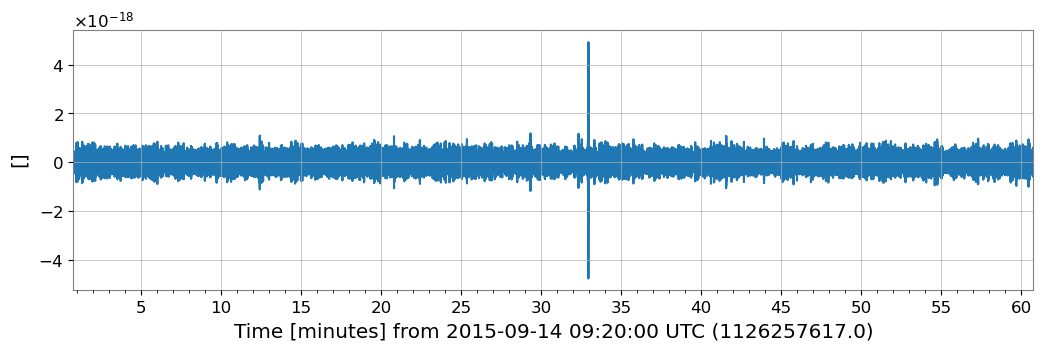

In [51]:
from gwpy.plot import Plot

#Plot raw data....   
plot_data=data.plot()
plot_data.show()

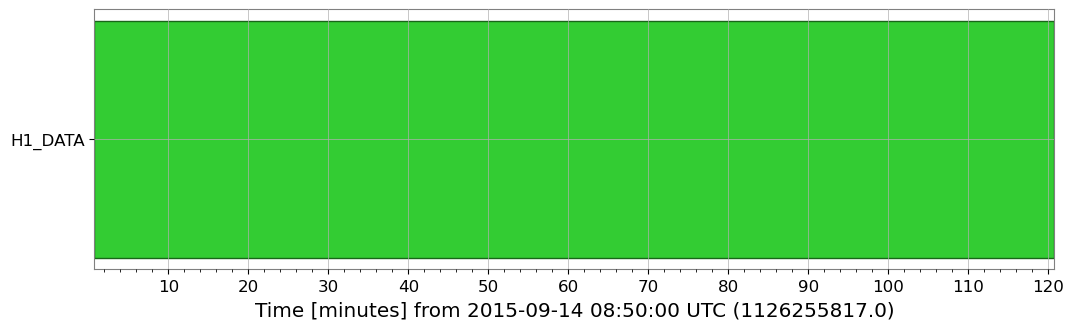

In [39]:
#..and segments. Green is data ok, red is data bad...
plot = segments.plot()

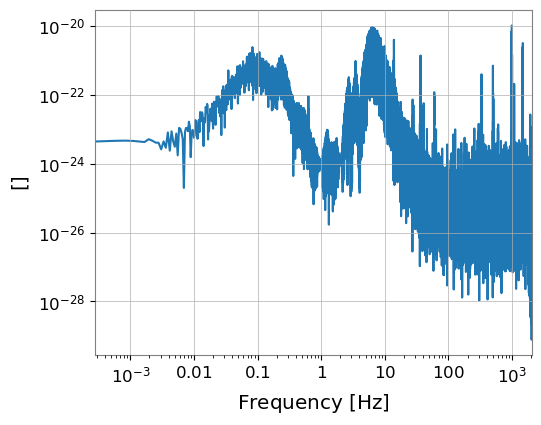

In [40]:
#Build the fft and plot it
fft_data = data.fft()
fft_plot = fft_data.abs().plot(xscale="log", yscale="log")

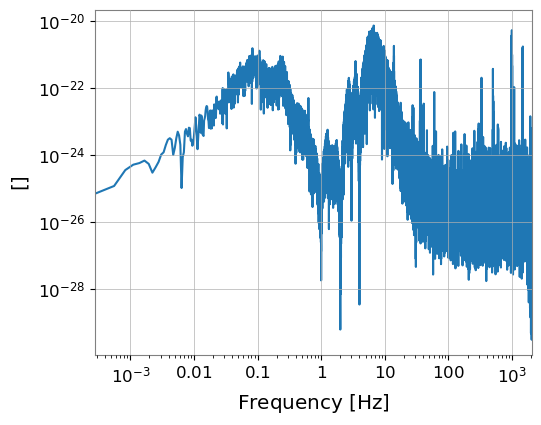

In [41]:
# This doesn't look correct at all! The problem is that the FFT works under the assumption that 
# our data are periodic, which means that the edges of our data look like discontinuities when transformed. 
# We need to apply a window function to our time-domain data before transforming, we will use the hann window

from scipy.signal import get_window
window = get_window('hann', data.size)
hwin = data * window

fftamp = hwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show()

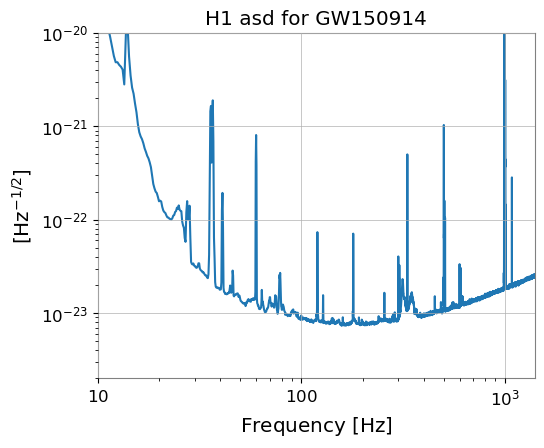

In [63]:
#Now we can plot the ASD as well, using GWPY and  the Welch method with a overlapping window of 4 seconds

asd = data.asd(fftlength=4, method="median")
plot = asd.plot()

ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(2e-24, 1e-20)
ax.set_title(ev_ifo+ " asd for "+ev_name)
plot.refresh()

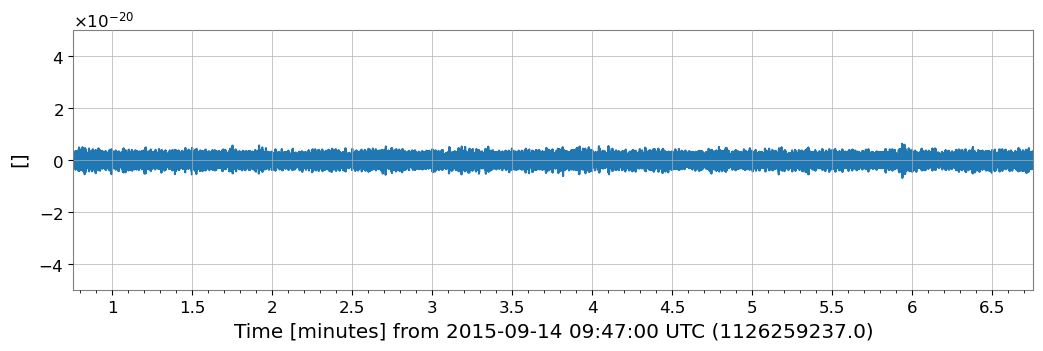

In [55]:
# WE can do some bandpass and see its effect

#First using a low-frequency bandpass
data_filtered=data.bandpass(16,64)

plot = data_filtered.plot()
ax = plot.gca()

#zoom around the event. Can we see something now?
ax.set_xlim(ev_gps-dt_win*0.1,ev_gps+dt_win*0.1)
ax.set_ylim(-5e-20,5e-20)
plot.refresh()

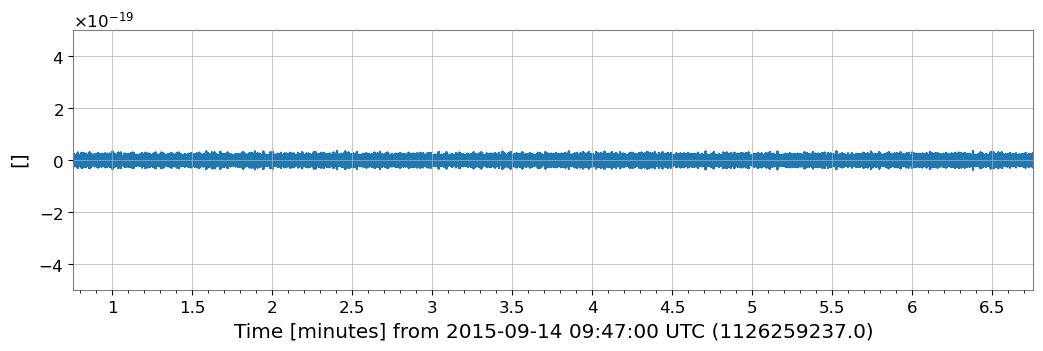

In [56]:
#then a high-frequency bandpass
data_filtered=data.bandpass(300,1000)

plot = data_filtered.plot()
ax = plot.gca()

#zoom around the event. Can we see something now?
ax.set_xlim(ev_gps-dt_win*0.1,ev_gps+dt_win*0.1)
ax.set_ylim(-5e-19,5e-19)
plot.refresh()

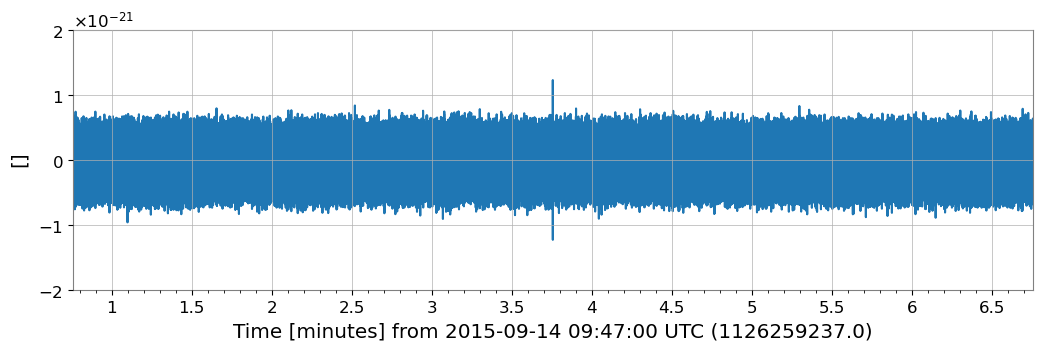

In [57]:
#then a medium frequency filter. Something is visible?
data_filtered=data.bandpass(50,250)

plot = data_filtered.plot()
ax = plot.gca()

#zoom around the event. Can we see something now?
ax.set_xlim(ev_gps-dt_win*0.1,ev_gps+dt_win*0.1)
ax.set_ylim(-2e-21,2e-21)
plot.refresh()

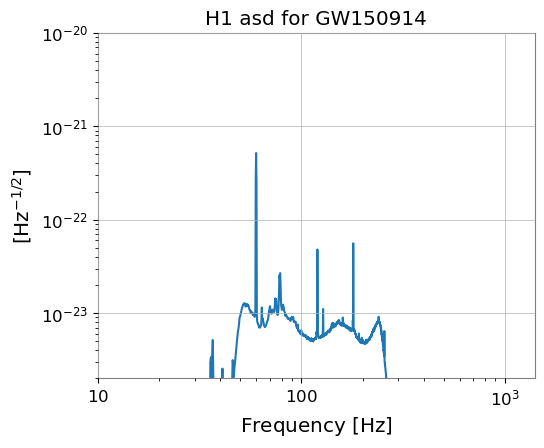

In [60]:
# one can take a look at the ASD of the filtered signal as well. This is a good double check on the filters that
# have been applied

asd = data_filtered.asd(fftlength=4, method="median")
plot = asd.plot()

ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(2e-24, 1e-20)
ax.set_title(ev_ifo+ " asd for "+ev_name)
plot.refresh()

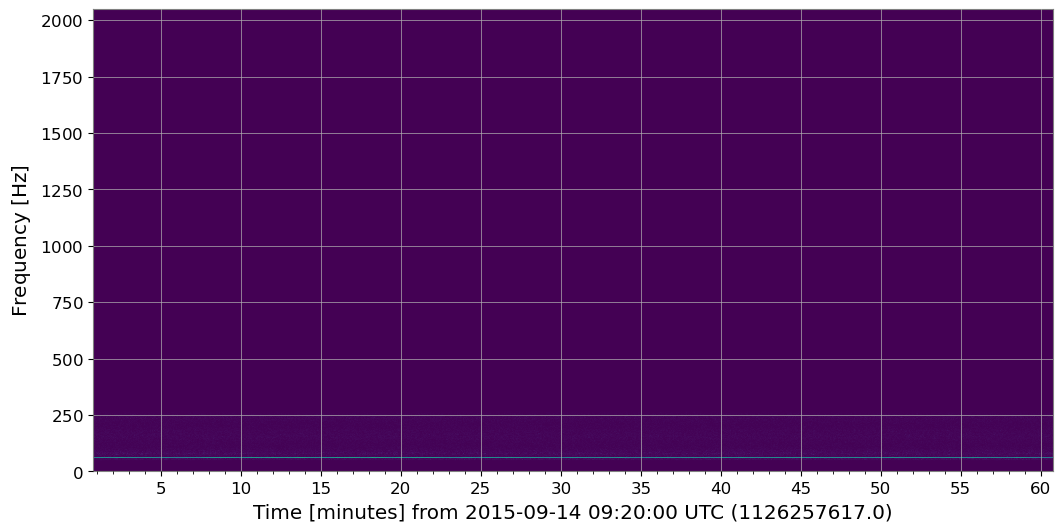

In [61]:
#now, the spectrograms
specgram = data_filtered.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()